In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# ----------------------------
# Upload Dataset in Colab
# ----------------------------
uploaded = files.upload()  # This will prompt you to choose the CSV file

# The uploaded file is stored in a dictionary; get the filename dynamically
file_name = list(uploaded.keys())[0]

# Load dataset
df = pd.read_csv(file_name)
print("First 5 rows of dataset:")
print(df.head())


Saving archive (1).zip to archive (1).zip
First 5 rows of dataset:
   Unnamed: 0 brand_name                                    model_name  \
0           0    ALCATEL          1 1/8GB Bluish Black (5033D-2JALUAA)   
1           1    ALCATEL  1 5033D 1/16GB Volcano Black (5033D-2LALUAF)   
2           2    ALCATEL  1 5033D 1/16GB Volcano Black (5033D-2LALUAF)   
3           3    ALCATEL  1 5033D 1/16GB Volcano Black (5033D-2LALUAF)   
4           4      Nokia                           1.3 1/16GB Charcoal   

        os  popularity  best_price  lowest_price  highest_price  \
0  Android         422      1690.0        1529.0         1819.0   
1  Android         323      1803.0        1659.0         2489.0   
2  Android         299      1803.0        1659.0         2489.0   
3  Android         287      1803.0        1659.0         2489.0   
4  Android        1047      1999.0           NaN            NaN   

   sellers_amount  screen_size  memory_size  battery_size release_date  
0           

In [5]:
# 1. Creating and manipulating NumPy arrays
arr = np.array(df["best_price"].dropna().head(5))
print("\nNumPy Array of first 5 best prices:", arr)

# 2. Random number generation and sampling
rand_arr = np.random.randint(1000, 5000, size=(4, 4))
print("\nRandom 4x4 Array:\n", rand_arr)

# 3. Indexing, slicing, and selection
print("\nFirst row:", rand_arr[0])
print("First column:", rand_arr[:, 0])
print("Subarray (rows 1-2, cols 1-2):\n", rand_arr[1:3, 1:3])

# 4. Basic array operations
print("\nSum:", arr.sum())
print("Mean:", arr.mean())
print("Squared Values:", np.square(arr))



NumPy Array of first 5 best prices: [1690. 1803. 1803. 1803. 1999.]

Random 4x4 Array:
 [[3937 4951 2146 2112]
 [4095 4419 1202 2015]
 [4223 2537 2823 2602]
 [3740 3603 2995 2194]]

First row: [3937 4951 2146 2112]
First column: [3937 4095 4223 3740]
Subarray (rows 1-2, cols 1-2):
 [[4419 1202]
 [2537 2823]]

Sum: 9098.0
Mean: 1819.6
Squared Values: [2856100. 3250809. 3250809. 3250809. 3996001.]


In [6]:
# ============================
# SECTION 2: Pandas
# ============================

# 1. Creating Series and DataFrames
series_example = pd.Series([1, 3, 5, np.nan, 6, 8])
print("\nExample Pandas Series:\n", series_example)

# 2. Handling missing/null data
print("\nMissing values per column:\n", df.isnull().sum())
df_filled = df.fillna(df.mean(numeric_only=True))
print("\nData after filling missing numeric values:\n", df_filled.head())

# 3. groupby, merging, joining, concatenation
brand_group = df_filled.groupby("brand_name")["best_price"].mean()
print("\nAverage best price by brand:\n", brand_group)

# Example concatenation
df_concat = pd.concat([df.head(3), df.tail(3)])
print("\nConcatenated DataFrame:\n", df_concat)

# 4. Reading/writing files
df_filled.to_csv("cleaned_phones_data.csv", index=False)


Example Pandas Series:
 0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Missing values per column:
 Unnamed: 0          0
brand_name          0
model_name          0
os                197
popularity          0
best_price          0
lowest_price      260
highest_price     260
sellers_amount      0
screen_size         2
memory_size       112
battery_size       10
release_date        0
dtype: int64

Data after filling missing numeric values:
    Unnamed: 0 brand_name                                    model_name  \
0           0    ALCATEL          1 1/8GB Bluish Black (5033D-2JALUAA)   
1           1    ALCATEL  1 5033D 1/16GB Volcano Black (5033D-2LALUAF)   
2           2    ALCATEL  1 5033D 1/16GB Volcano Black (5033D-2LALUAF)   
3           3    ALCATEL  1 5033D 1/16GB Volcano Black (5033D-2LALUAF)   
4           4      Nokia                           1.3 1/16GB Charcoal   

        os  popularity  best_price  lowest_price  highest_price  \
0  Android         42

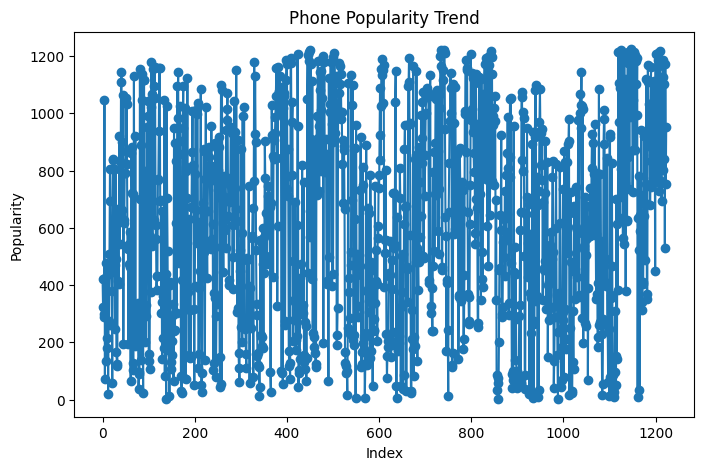

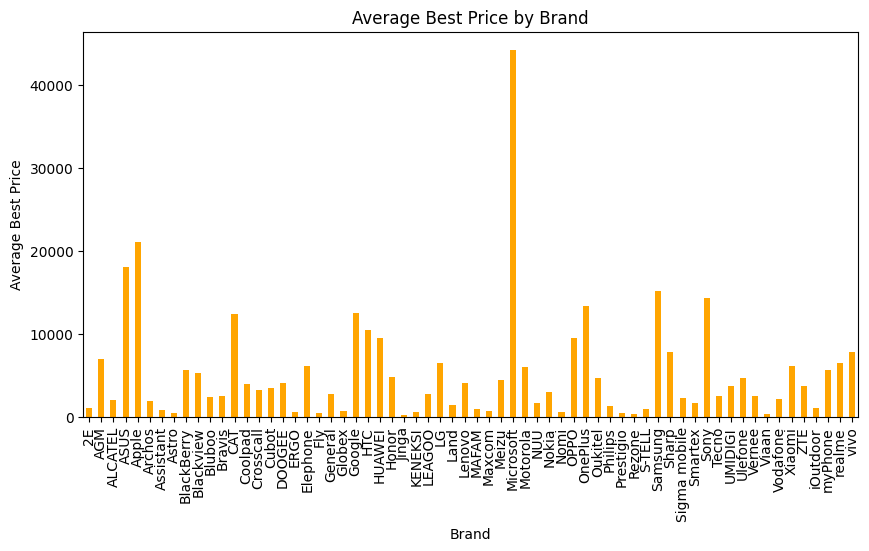

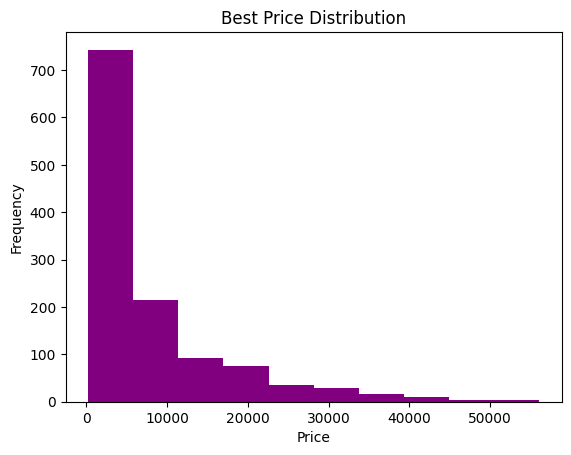

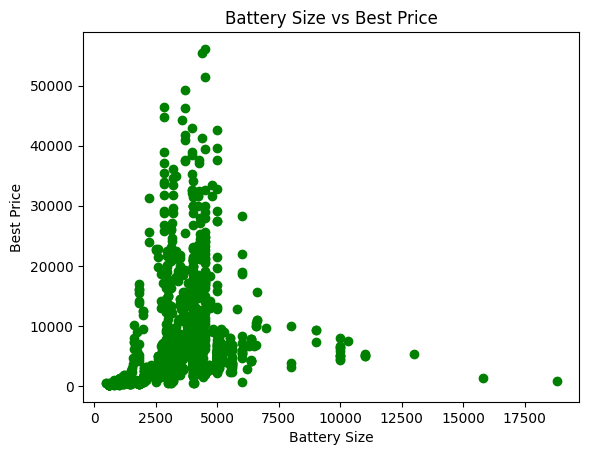

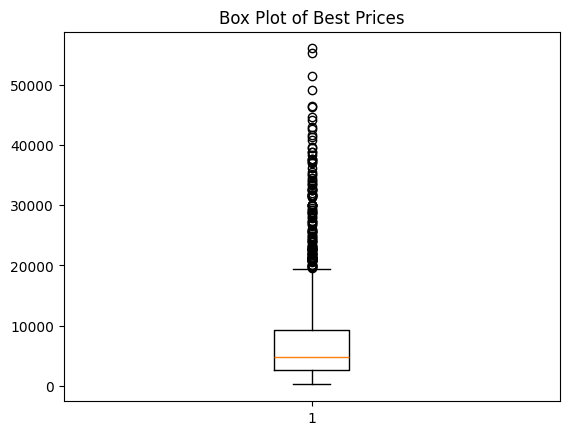

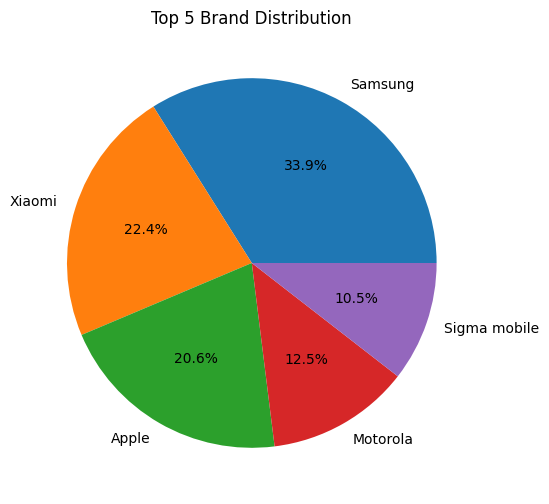

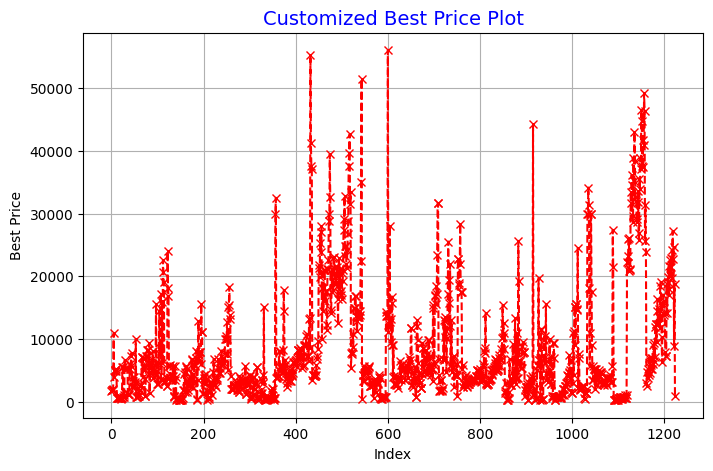

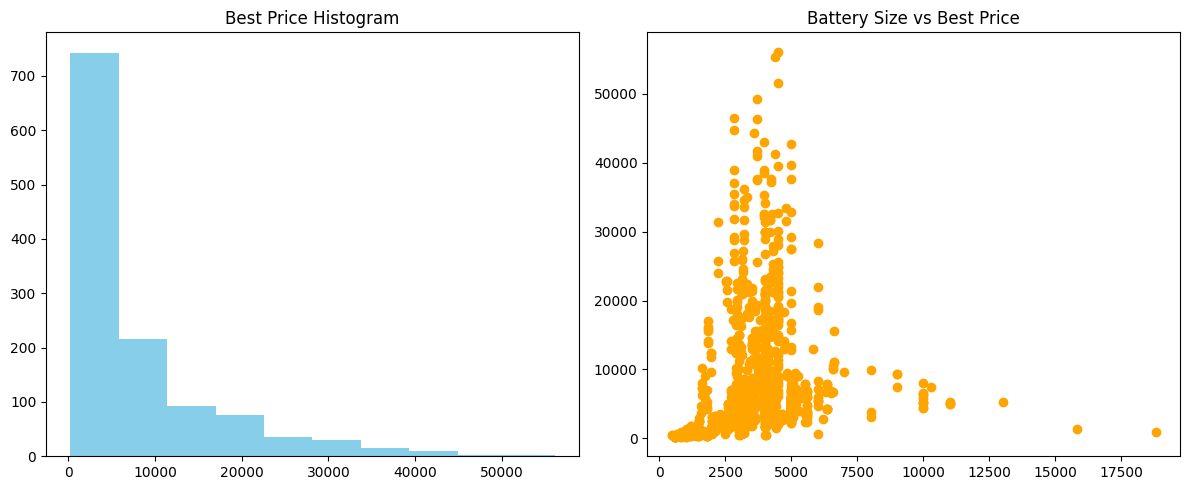

In [7]:
# ============================
# SECTION 3: Matplotlib
# ============================

# 1. Line Chart – Popularity over index
plt.figure(figsize=(8,5))
plt.plot(df_filled.index, df_filled["popularity"], marker='o')
plt.title("Phone Popularity Trend")
plt.xlabel("Index")
plt.ylabel("Popularity")
plt.show()

# 2. Bar Chart – Average best price by brand
brand_group.plot(kind="bar", color='orange', figsize=(10,5))
plt.title("Average Best Price by Brand")
plt.xlabel("Brand")
plt.ylabel("Average Best Price")
plt.show()

# 3. Histogram – Price distribution
plt.hist(df_filled["best_price"], bins=10, color='purple')
plt.title("Best Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

# 4. Scatter Plot – Battery vs Best Price
plt.scatter(df_filled["battery_size"], df_filled["best_price"], color='green')
plt.title("Battery Size vs Best Price")
plt.xlabel("Battery Size")
plt.ylabel("Best Price")
plt.show()

# 5. Box Plot – Best Prices
plt.boxplot(df_filled["best_price"])
plt.title("Box Plot of Best Prices")
plt.show()

# 6. Pie Chart – Brand distribution
brand_counts = df_filled["brand_name"].value_counts().head(5)
brand_counts.plot(kind="pie", autopct='%1.1f%%', figsize=(6,6))
plt.title("Top 5 Brand Distribution")
plt.ylabel("")
plt.show()

# 2. Customized Line Plot
plt.figure(figsize=(8,5))
plt.plot(df_filled["best_price"], color="red", linestyle="--", marker="x")
plt.title("Customized Best Price Plot", fontsize=14, color="blue")
plt.xlabel("Index")
plt.ylabel("Best Price")
plt.grid(True)
plt.show()

# 3. Subplots – Histogram and Scatter
fig, axs = plt.subplots(1, 2, figsize=(12,5))
axs[0].hist(df_filled["best_price"], color="skyblue")
axs[0].set_title("Best Price Histogram")
axs[1].scatter(df_filled["battery_size"], df_filled["best_price"], color="orange")
axs[1].set_title("Battery Size vs Best Price")
plt.tight_layout()
plt.show()